In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
plt.rcParams['font.size'] = 20

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
train = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/DEAP-Dataset/EEG-Final/Data/train_df.csv')
test = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/DEAP-Dataset/EEG-Final/Data/test_df.csv')

In [ ]:
# Rename the column 'Dominance' to 'Dominancencoded_e'
train.rename(columns={'Domain': 'Dominance'}, inplace=True)
test.rename(columns={'Domain': 'Dominance'}, inplace=True)

In [ ]:
# Rename the column 'Liking' to 'Liking'
train.rename(columns={'Like': 'Liking'}, inplace=True)
test.rename(columns={'Like': 'Liking'}, inplace=True)

### Three class

In [ ]:
# Copy
encoded_train = train.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Valence']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-8-9a098822ecc2>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Valence']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-9-381df95ed99b>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


### Ideal

In [ ]:
X_train = encoded_train[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
Y_train = encoded_train['Valence']  # Target label

x_test = encoded_test[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
y_test = encoded_test['Valence']  # Target label

## Deep Learning Algorithms

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

## Ideal

## Valence

### CNN Model with Residual Connection

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 61, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 61, 32)         │            224 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 61, 32)         │            128 │ conv1d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 61, 32)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_17 (Conv1D)        │ (None, 61, 32)         │          6,176 │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_18 (Conv1D)        │ (None, 61, 32)         │             64 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 61, 32)         │            128 │ conv1d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 61, 32)         │              0 │ conv1d_18[0][0],       │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 61, 32)         │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 30, 32)         │              0 │ activation_9[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_19 (Conv1D)        │ (None, 30, 64)         │         12,352 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 30, 64)         │            256 │ conv1d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_10             │ (None, 30, 64)         │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_20 (Conv1D)        │ (None, 30, 64)         │         24,640 │ activation_10[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_21 (Conv1D)        │ (None, 30, 64)         │          2,112 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 30, 64)         │            256 │ conv1d_20[0][0]        │
│ (BatchNormalization) 

 Total params: 937,667 (3.58 MB)

 Trainable params: 935,747 (3.57 MB)

 Non-trainable params: 1,920 (7.50 KB)

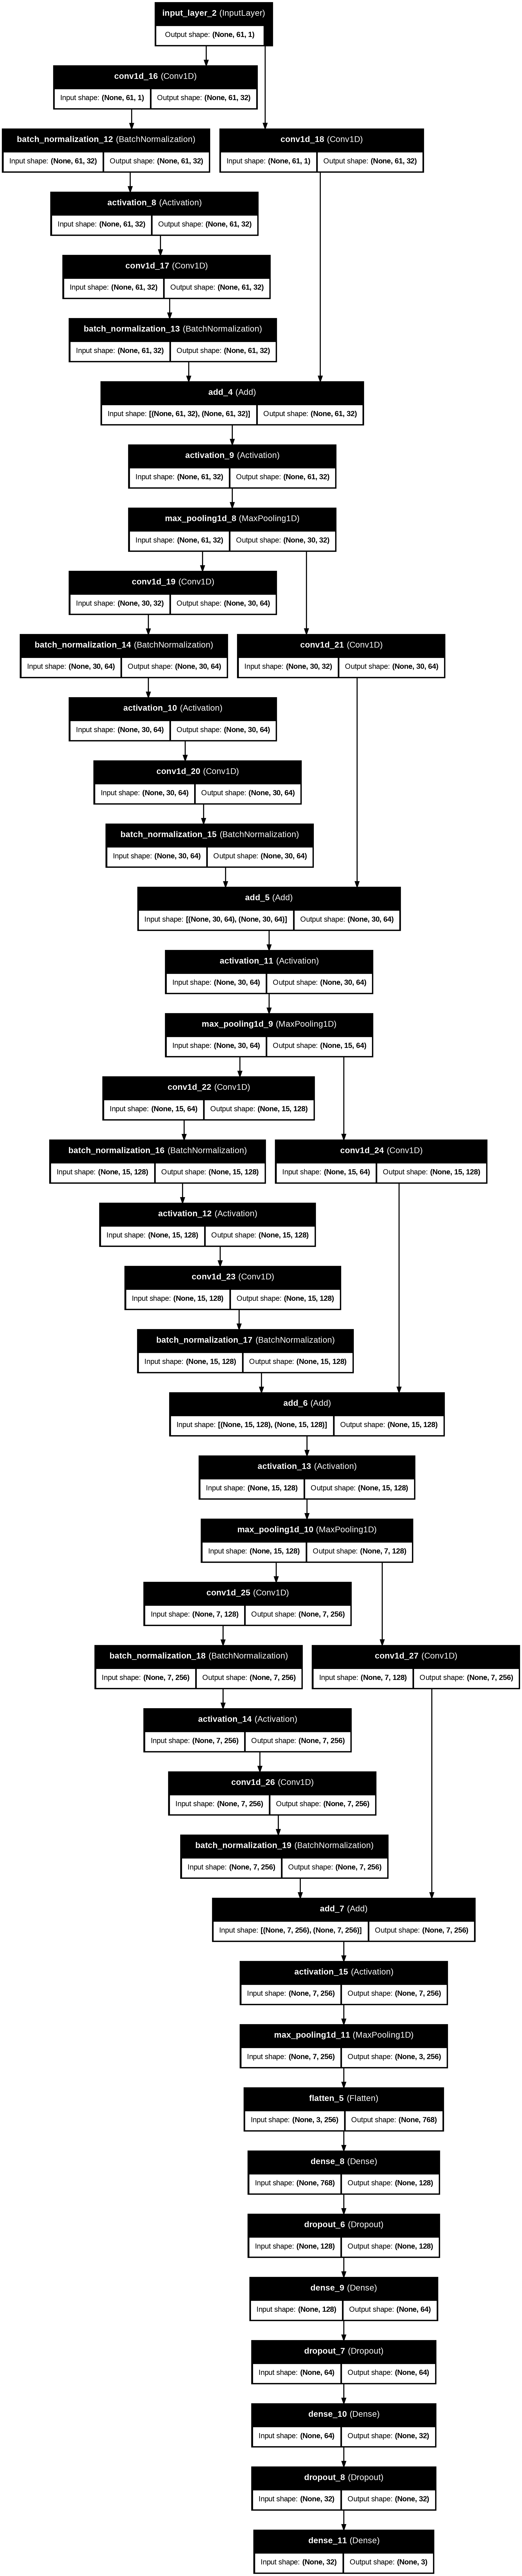

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(3, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

### CNN Model with Residual Connection

**Compiling the model**

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

**Automatic save
(We have saved all the details of every epoch in google drive so that we can use this when we need.)**


In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5006 - loss: 0.9875
Epoch 1: accuracy improved from -inf to 0.55207, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/History/CNNweights-improvement-01-0.5521.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 48s 7ms/step - accuracy: 0.5006 - loss: 0.9875 - val_accuracy: 0.6195 - val_loss: 0.8075
Epoch 2/100
4681/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6326 - loss: 0.7912
Epoch 2: accuracy improved from 0.55207 to 0.64710, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/History/CNNweights-improvement-02-0.6471.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.6326 - loss: 0.7912 - val_accuracy: 0.6807 - val_loss: 0.6911
Epoch 3/100
4682/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6935 - loss: 0.6790
Epoch 3: accuracy improved from 0.64710 to 0.70273, saving model

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='macro'))  # Changed average to 'macro'
    recall_scores.append(recall_score(y_resampled, y_pred, average='macro'))        # Changed average to 'macro'
    f1_scores.append(f1_score(y_resampled, y_pred, average='macro'))                # Changed average to 'macro'

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision (macro): {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall (macro): {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score (macro): {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Confidence interval for accuracy: 0.9405 - 0.9422
Confidence interval for precision (macro): 0.9396 - 0.9413
Confidence interval for recall (macro): 0.9381 - 0.9398
Confidence interval for F1 score (macro): 0.9388 - 0.9405


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9414 - loss: 0.2377
Test Accuracy: 94.12%


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step
Test Accuracy for Class 0: 92.11%
Test Accuracy for Class 1: 93.98%
Test Accuracy for Class 2: 95.51%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9414 - loss: 0.2377
Test loss: 0.24106727540493011
Test accuracy: 0.9411565065383911


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


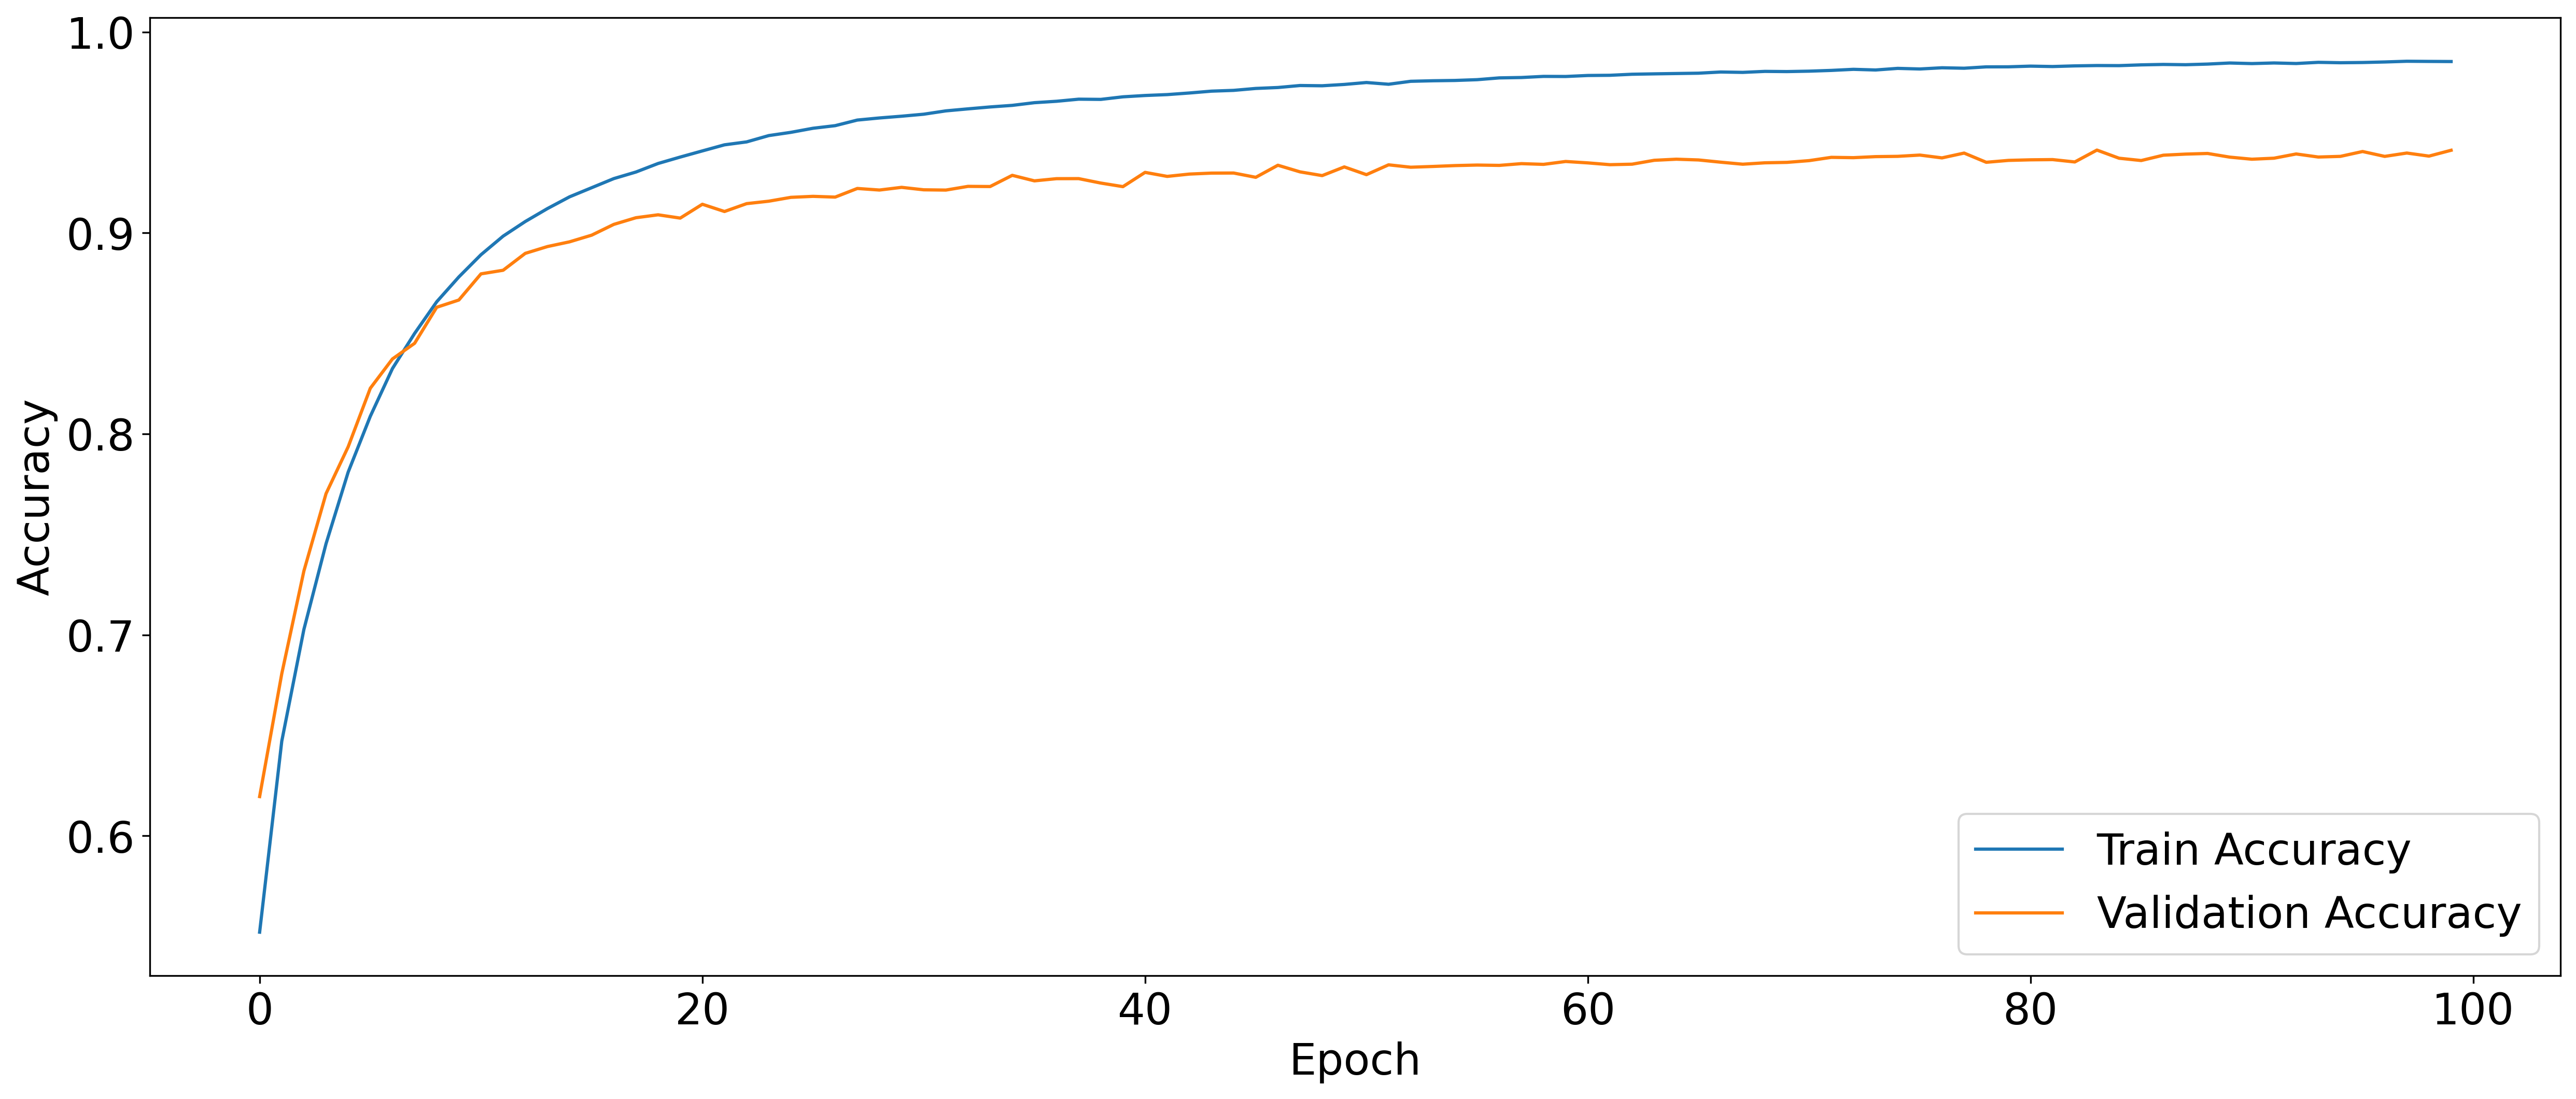

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Valence/model.h5")

In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9414 - loss: 0.2377
Test loss: 0.24106727540493011
Test accuracy: 0.9411565065383911


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     43432
           1       0.93      0.94      0.93     46116
           2       0.95      0.95      0.95     66612

   micro avg       0.94      0.94      0.94    156160
   macro avg       0.94      0.94      0.94    156160
weighted avg       0.94      0.94      0.94    156160
 samples avg       0.94      0.94      0.94    156160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


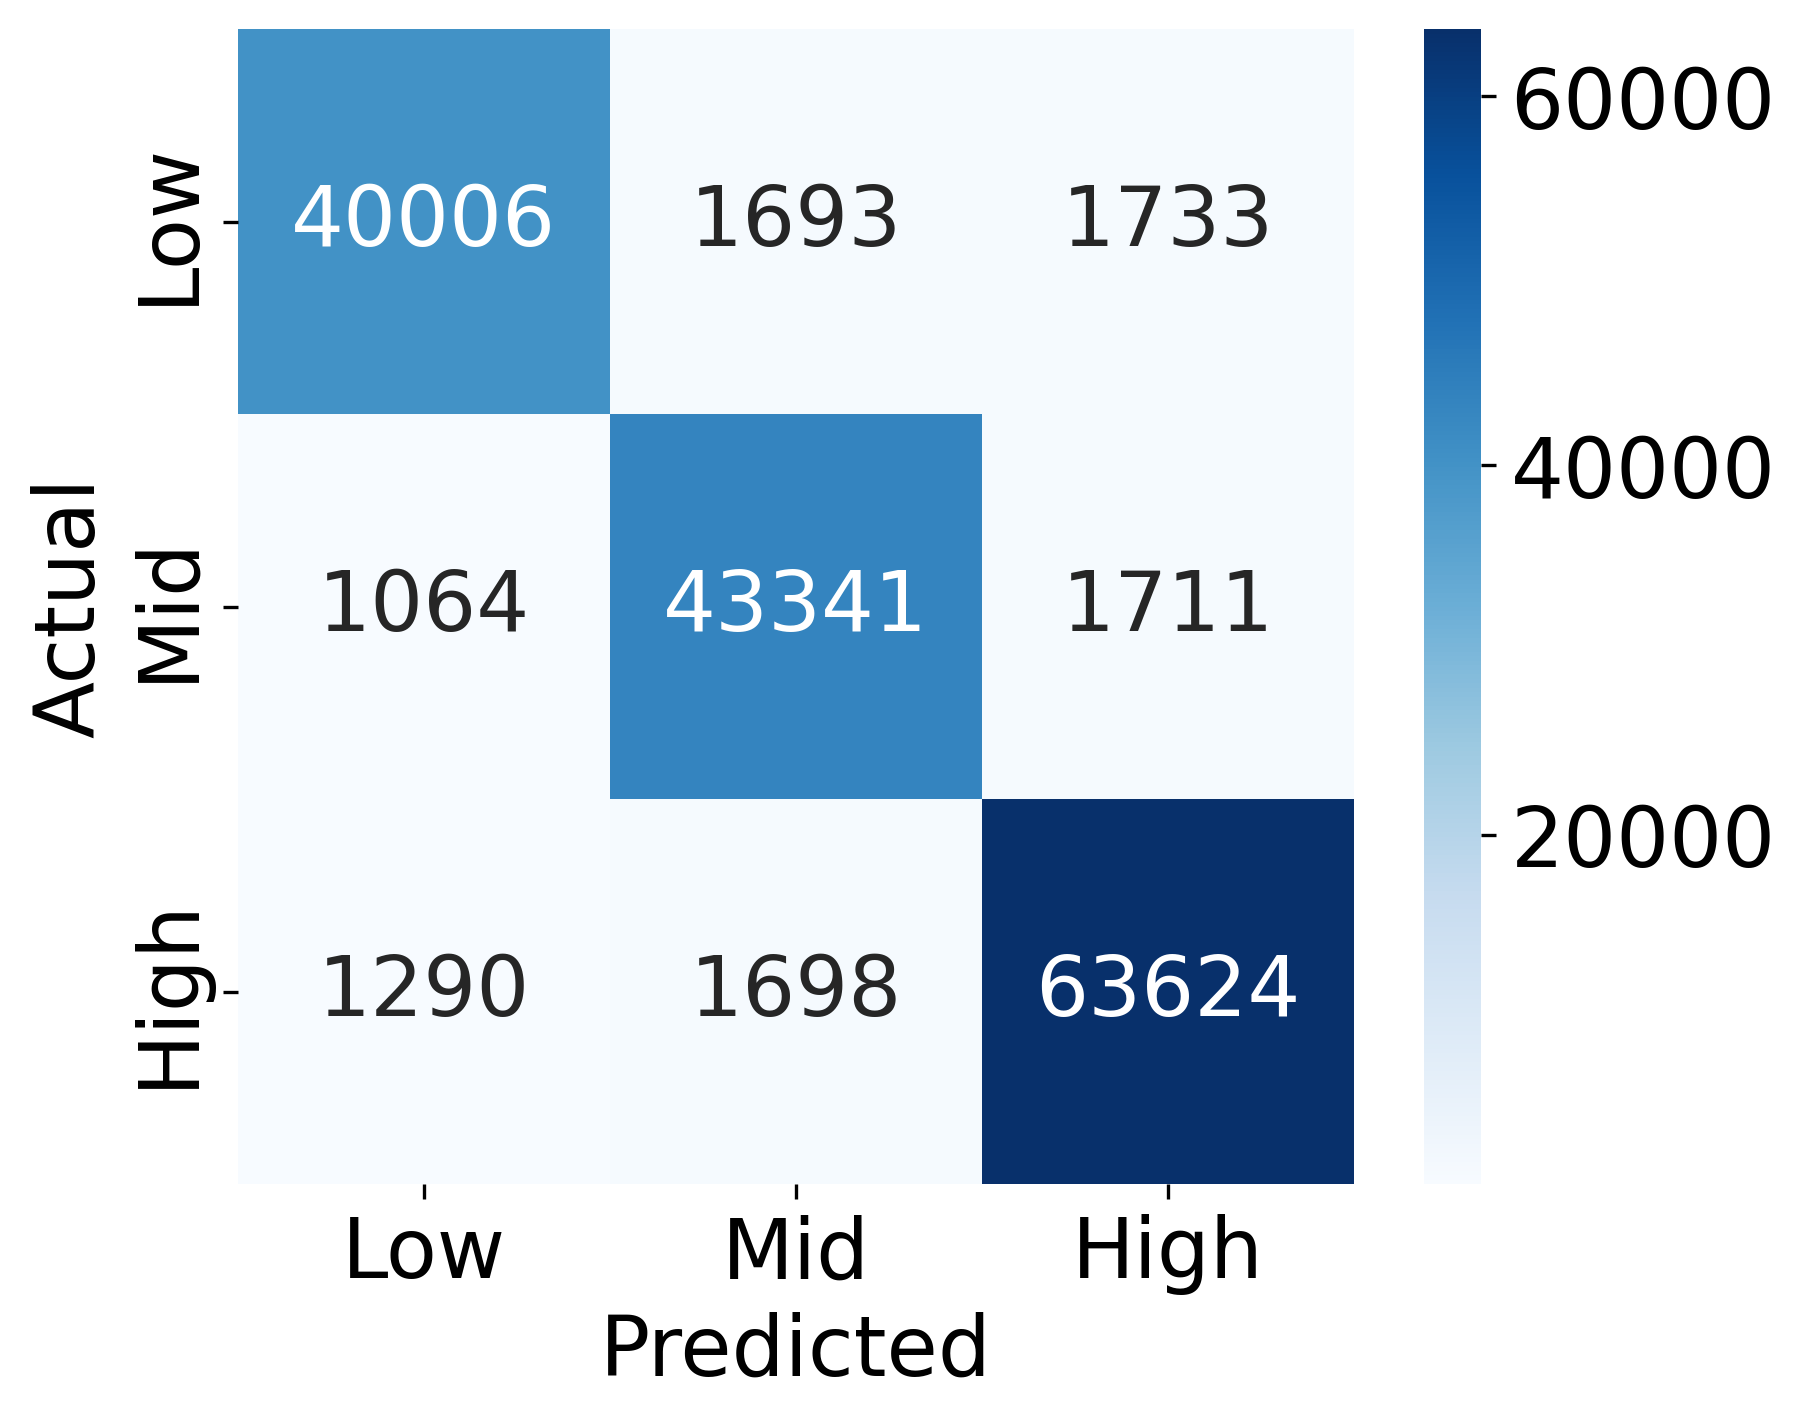

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


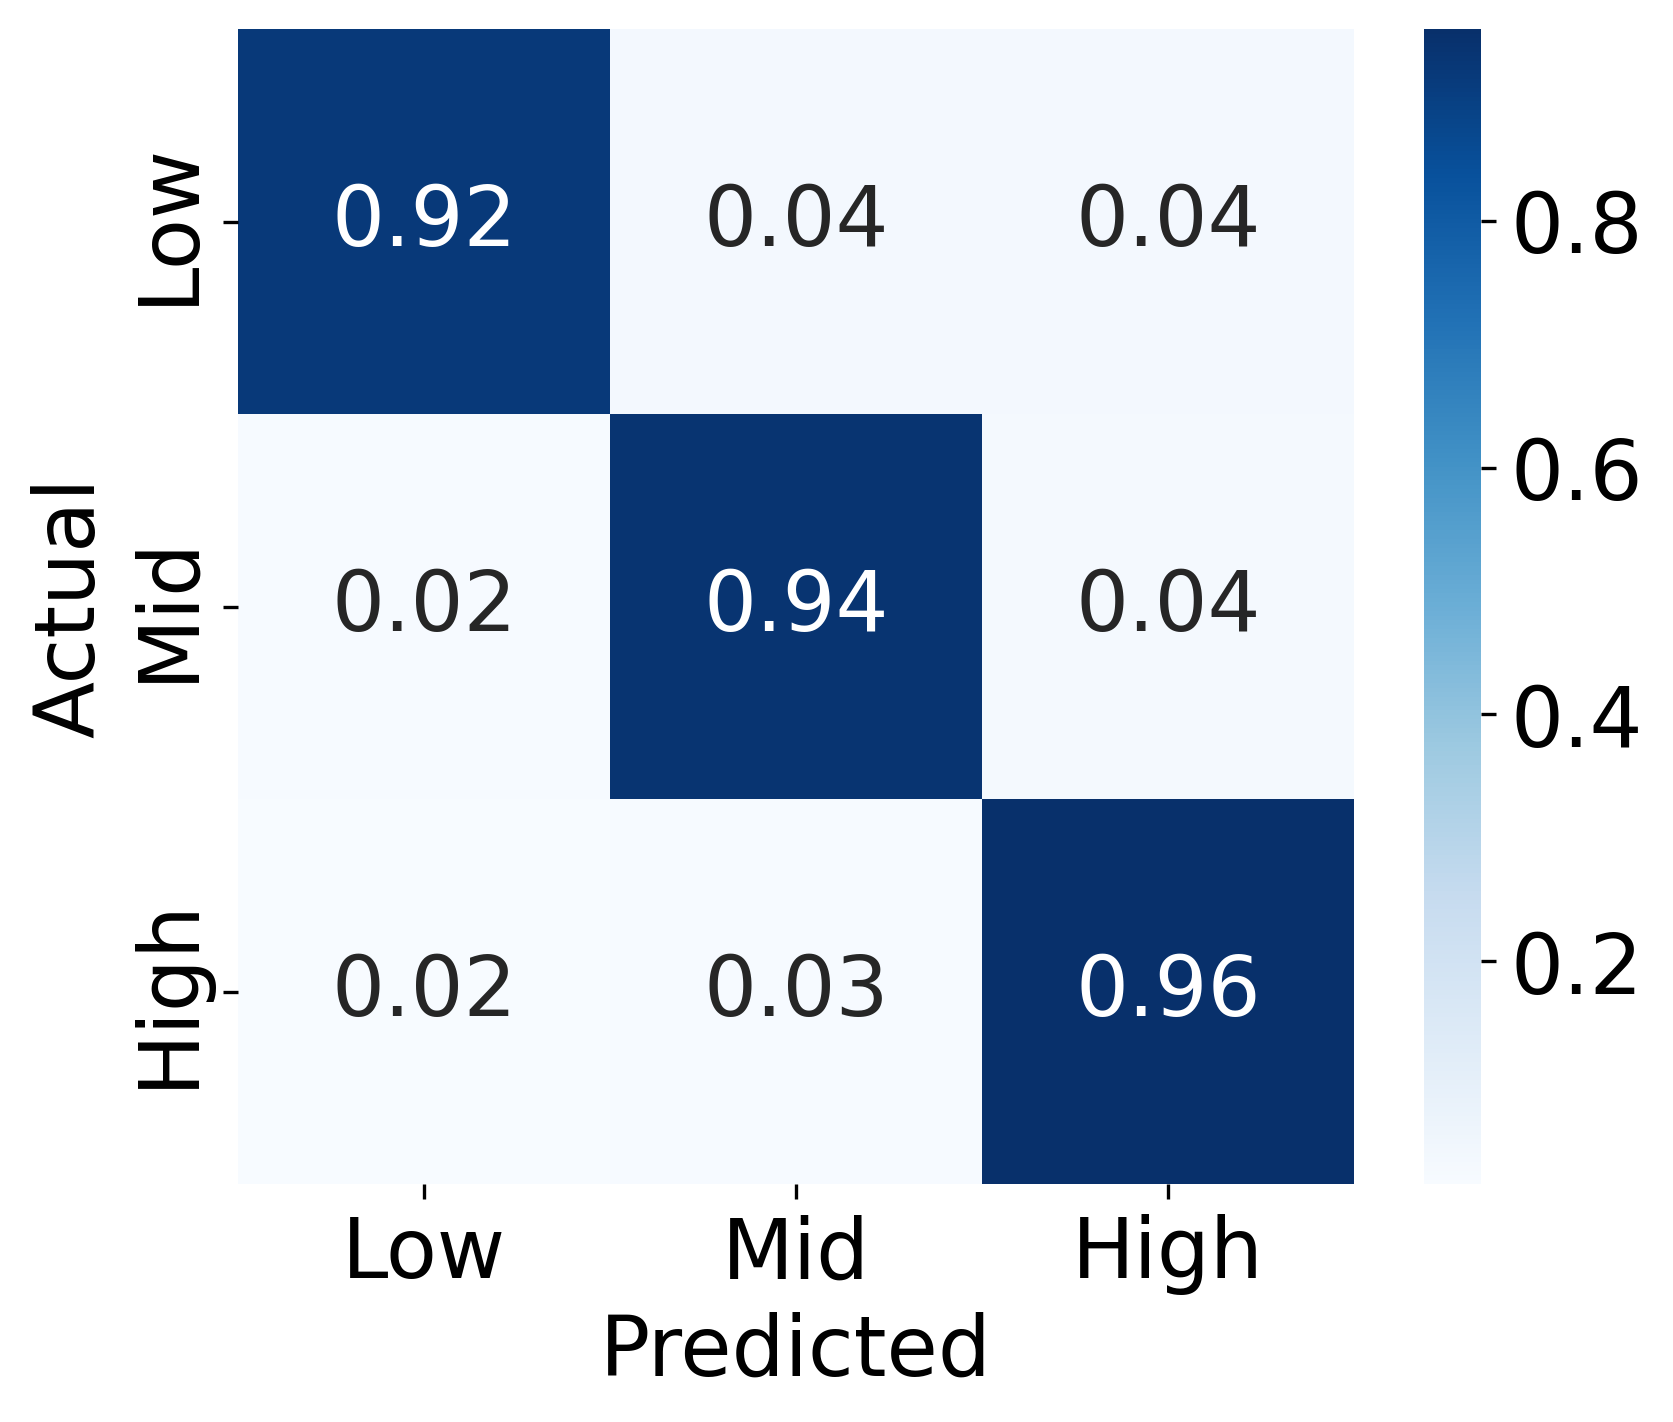

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'Mid', 'High'],
                 yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

# Arousal

### Arousal

In [ ]:
# Copy
encoded_train = train.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Arousal']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-13-db0ae408bb68>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Arousal']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-14-9c771b6e9ddf>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


### Arousal

In [ ]:
X_train = encoded_train[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
Y_train = encoded_train['Arousal']  # Target label

x_test = encoded_test[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
y_test = encoded_test['Arousal']  # Target label

### CNN Model with Residual Connection

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 61, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_28 (Conv1D)        │ (None, 61, 32)         │            224 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 61, 32)         │            128 │ conv1d_28[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_16             │ (None, 61, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_29 (Conv1D)        │ (None, 61, 32)         │          6,176 │ activation_16[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_30 (Conv1D)        │ (None, 61, 32)         │             64 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 61, 32)         │            128 │ conv1d_29[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 61, 32)         │              0 │ conv1d_30[0][0],       │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_17             │ (None, 61, 32)         │              0 │ add_8[0][0]            │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_12          │ (None, 30, 32)         │              0 │ activation_17[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_31 (Conv1D)        │ (None, 30, 64)         │         12,352 │ max_pooling1d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 30, 64)         │            256 │ conv1d_31[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_18             │ (None, 30, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_32 (Conv1D)        │ (None, 30, 64)         │         24,640 │ activation_18[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_33 (Conv1D)        │ (None, 30, 64)         │          2,112 │ max_pooling1d_12[0][0] │
├──────────────────────

 Total params: 937,667 (3.58 MB)

 Trainable params: 935,747 (3.57 MB)

 Non-trainable params: 1,920 (7.50 KB)

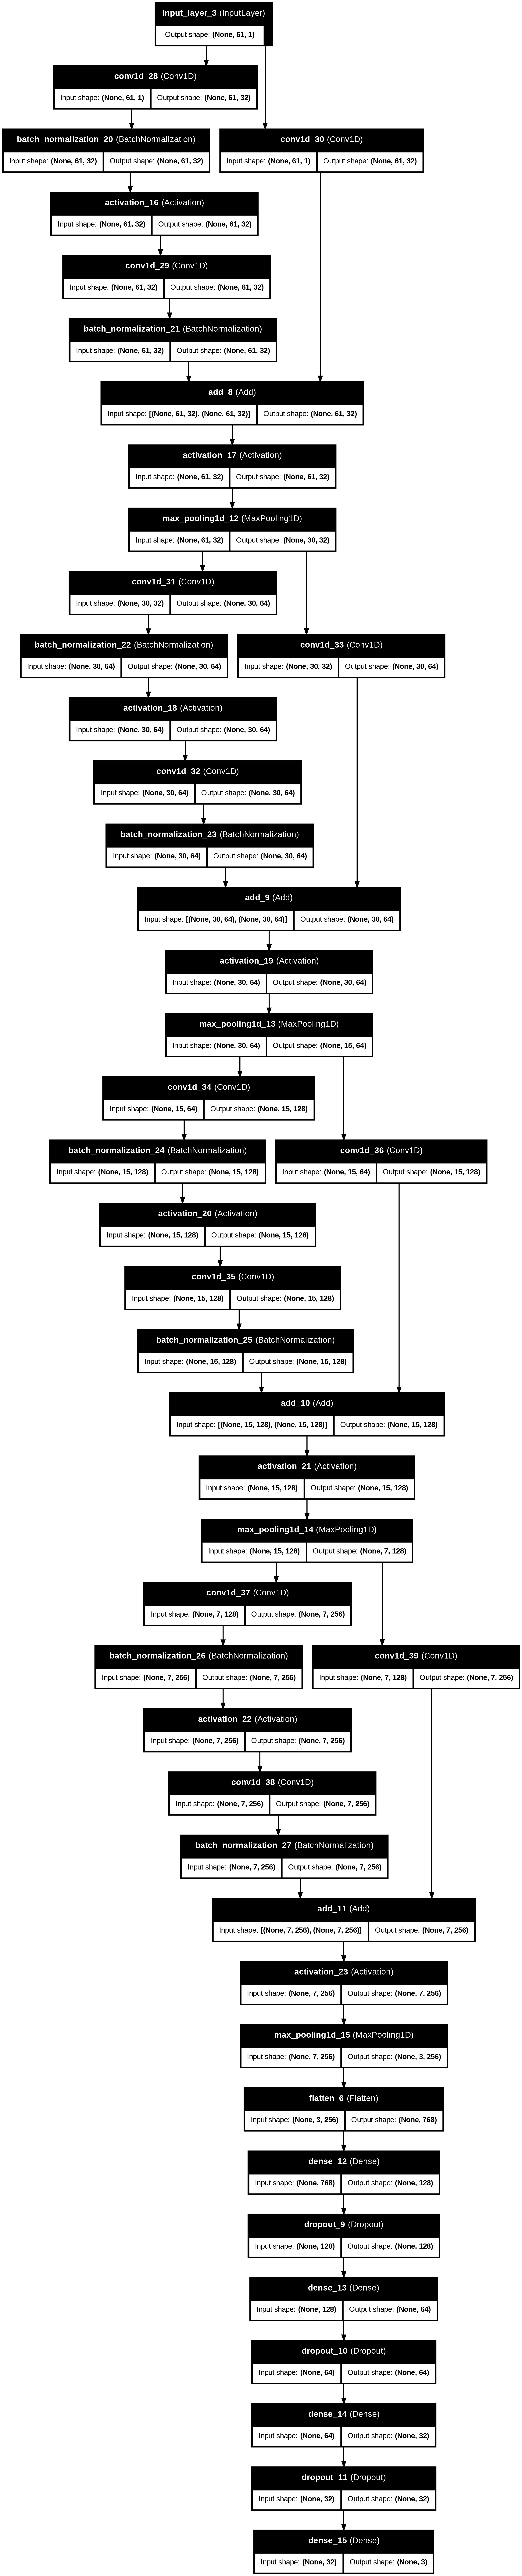

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(3, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

**Compiling the model**

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

**Automatic save
(We have saved all the details of every epoch in google drive so that we can use this when we need.)**


In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5010 - loss: 0.9955
Epoch 1: accuracy improved from -inf to 0.55122, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/History/CNNweights-improvement-01-0.5512.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.5010 - loss: 0.9955 - val_accuracy: 0.6164 - val_loss: 0.8229
Epoch 2/100
4683/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6298 - loss: 0.8067
Epoch 2: accuracy improved from 0.55122 to 0.64555, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/History/CNNweights-improvement-02-0.6456.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.6298 - loss: 0.8067 - val_accuracy: 0.6828 - val_loss: 0.6989
Epoch 3/100
4679/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6951 - loss: 0.6880
Epoch 3: accuracy improved from 0.64555 to 0.70471, saving model

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='macro'))  # Changed average to 'macro'
    recall_scores.append(recall_score(y_resampled, y_pred, average='macro'))        # Changed average to 'macro'
    f1_scores.append(f1_score(y_resampled, y_pred, average='macro'))                # Changed average to 'macro'

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision (macro): {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall (macro): {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score (macro): {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Confidence interval for accuracy: 0.9408 - 0.9420
Confidence interval for precision (macro): 0.9412 - 0.9423
Confidence interval for recall (macro): 0.9384 - 0.9396
Confidence interval for F1 score (macro): 0.9397 - 0.9409


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9393 - loss: 0.2446
Test Accuracy: 94.12%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9393 - loss: 0.2446
Test loss: 0.23850923776626587
Test accuracy: 0.9411693215370178


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step
Test Accuracy for Class 0: 92.46%
Test Accuracy for Class 1: 93.35%
Test Accuracy for Class 2: 95.82%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


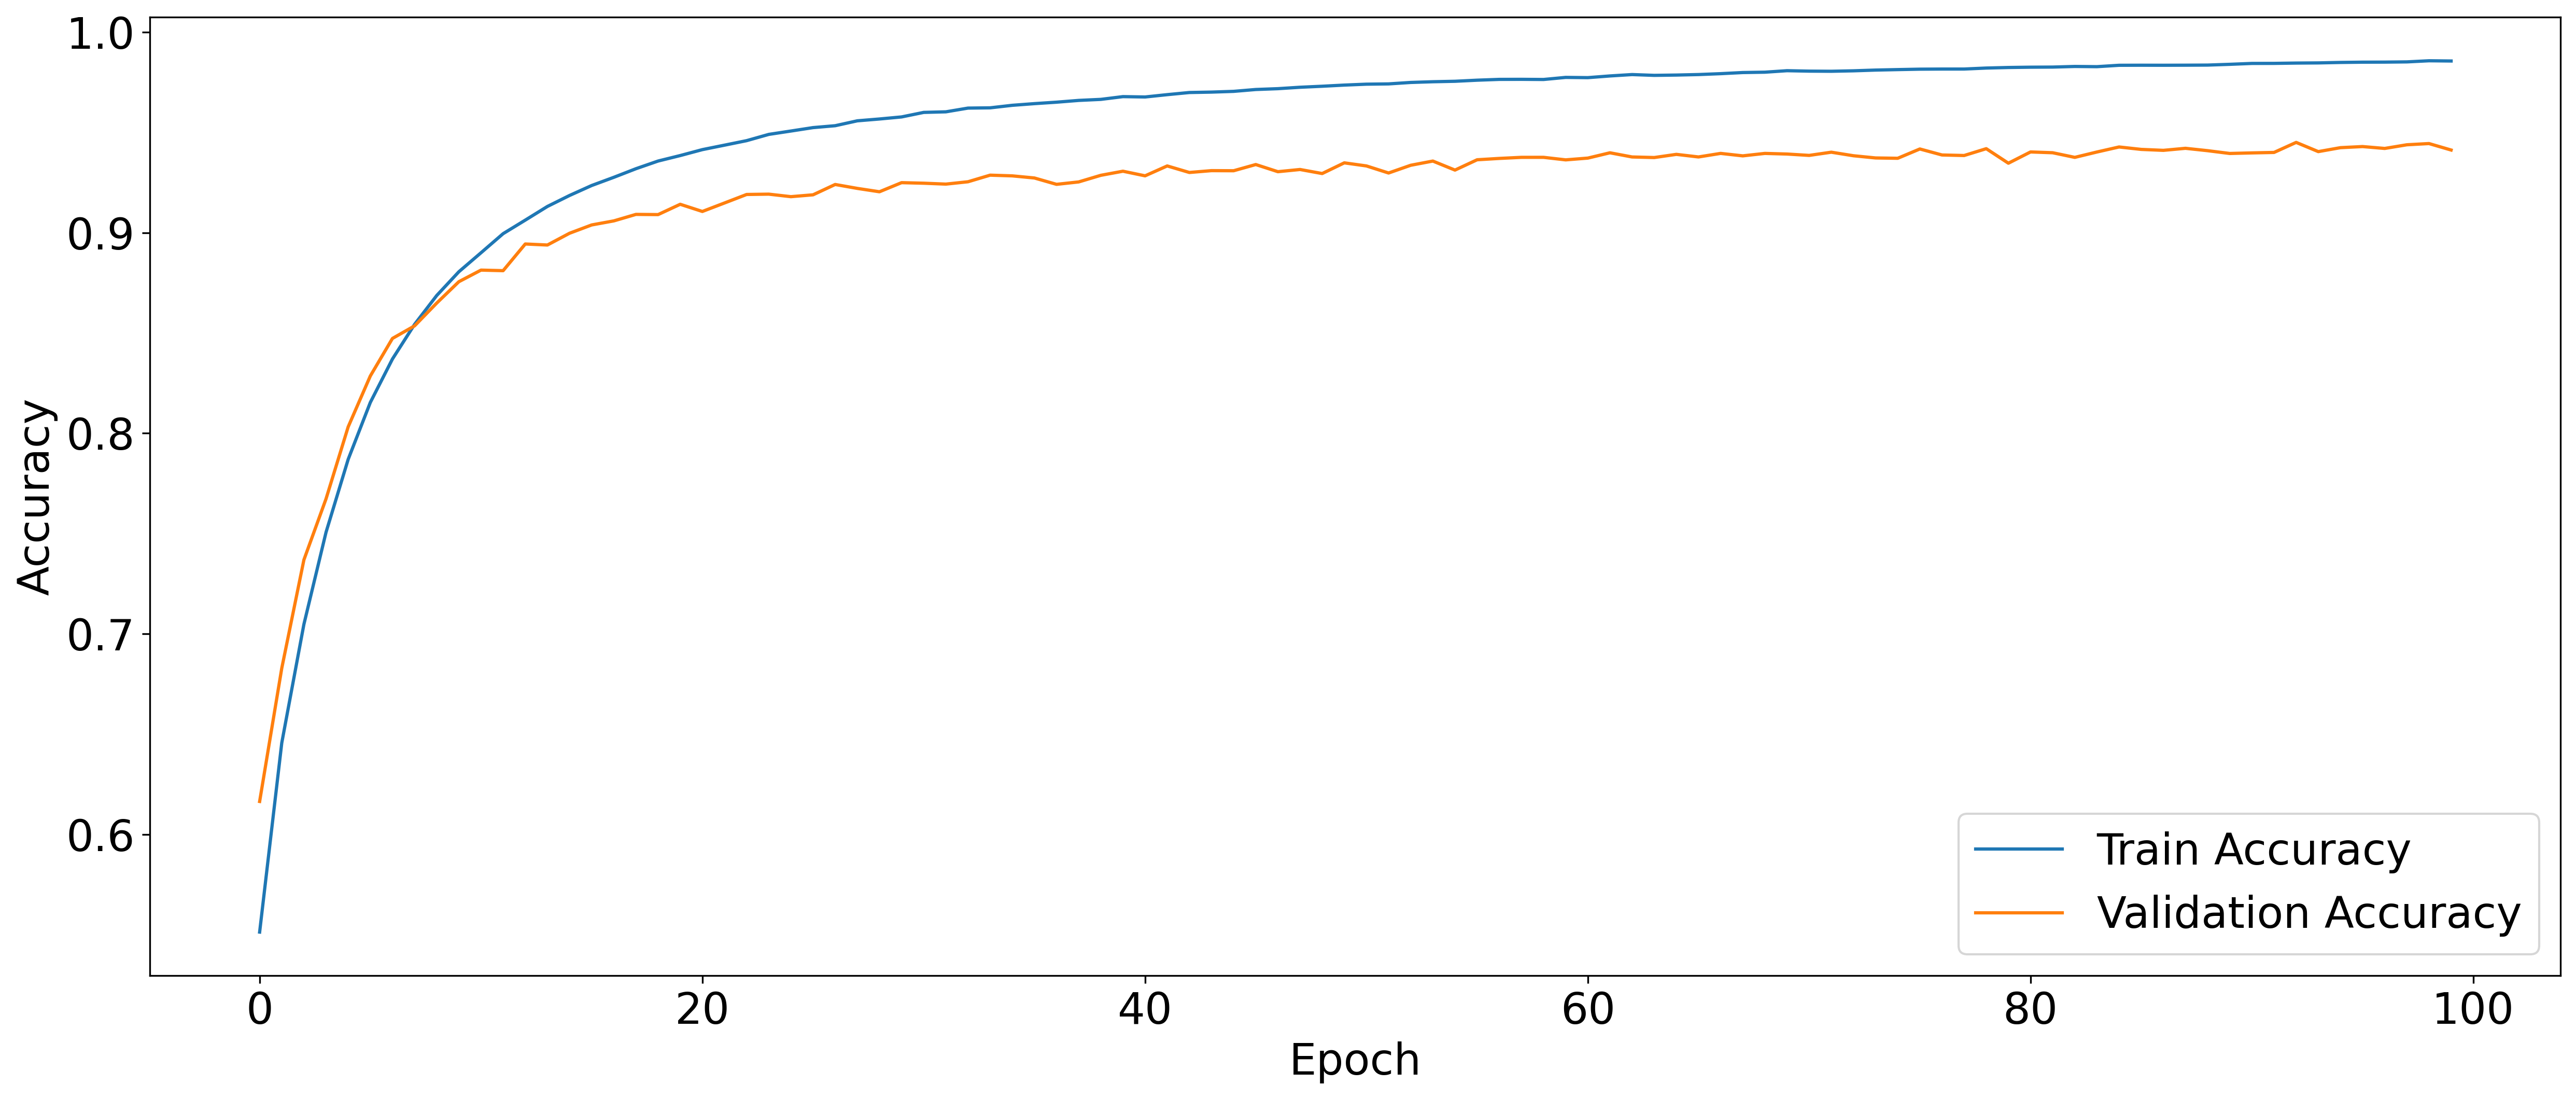

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Arousal/model.h5")

In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9393 - loss: 0.2446
Test loss: 0.23850923776626587
Test accuracy: 0.9411693215370178


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step
Test Accuracy for Class 0: 92.46%
Test Accuracy for Class 1: 93.35%
Test Accuracy for Class 2: 95.82%


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     44896
           1       0.94      0.93      0.93     46360
           2       0.94      0.96      0.95     64904

   micro avg       0.94      0.94      0.94    156160
   macro avg       0.94      0.94      0.94    156160
weighted avg       0.94      0.94      0.94    156160
 samples avg       0.94      0.94      0.94    156160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


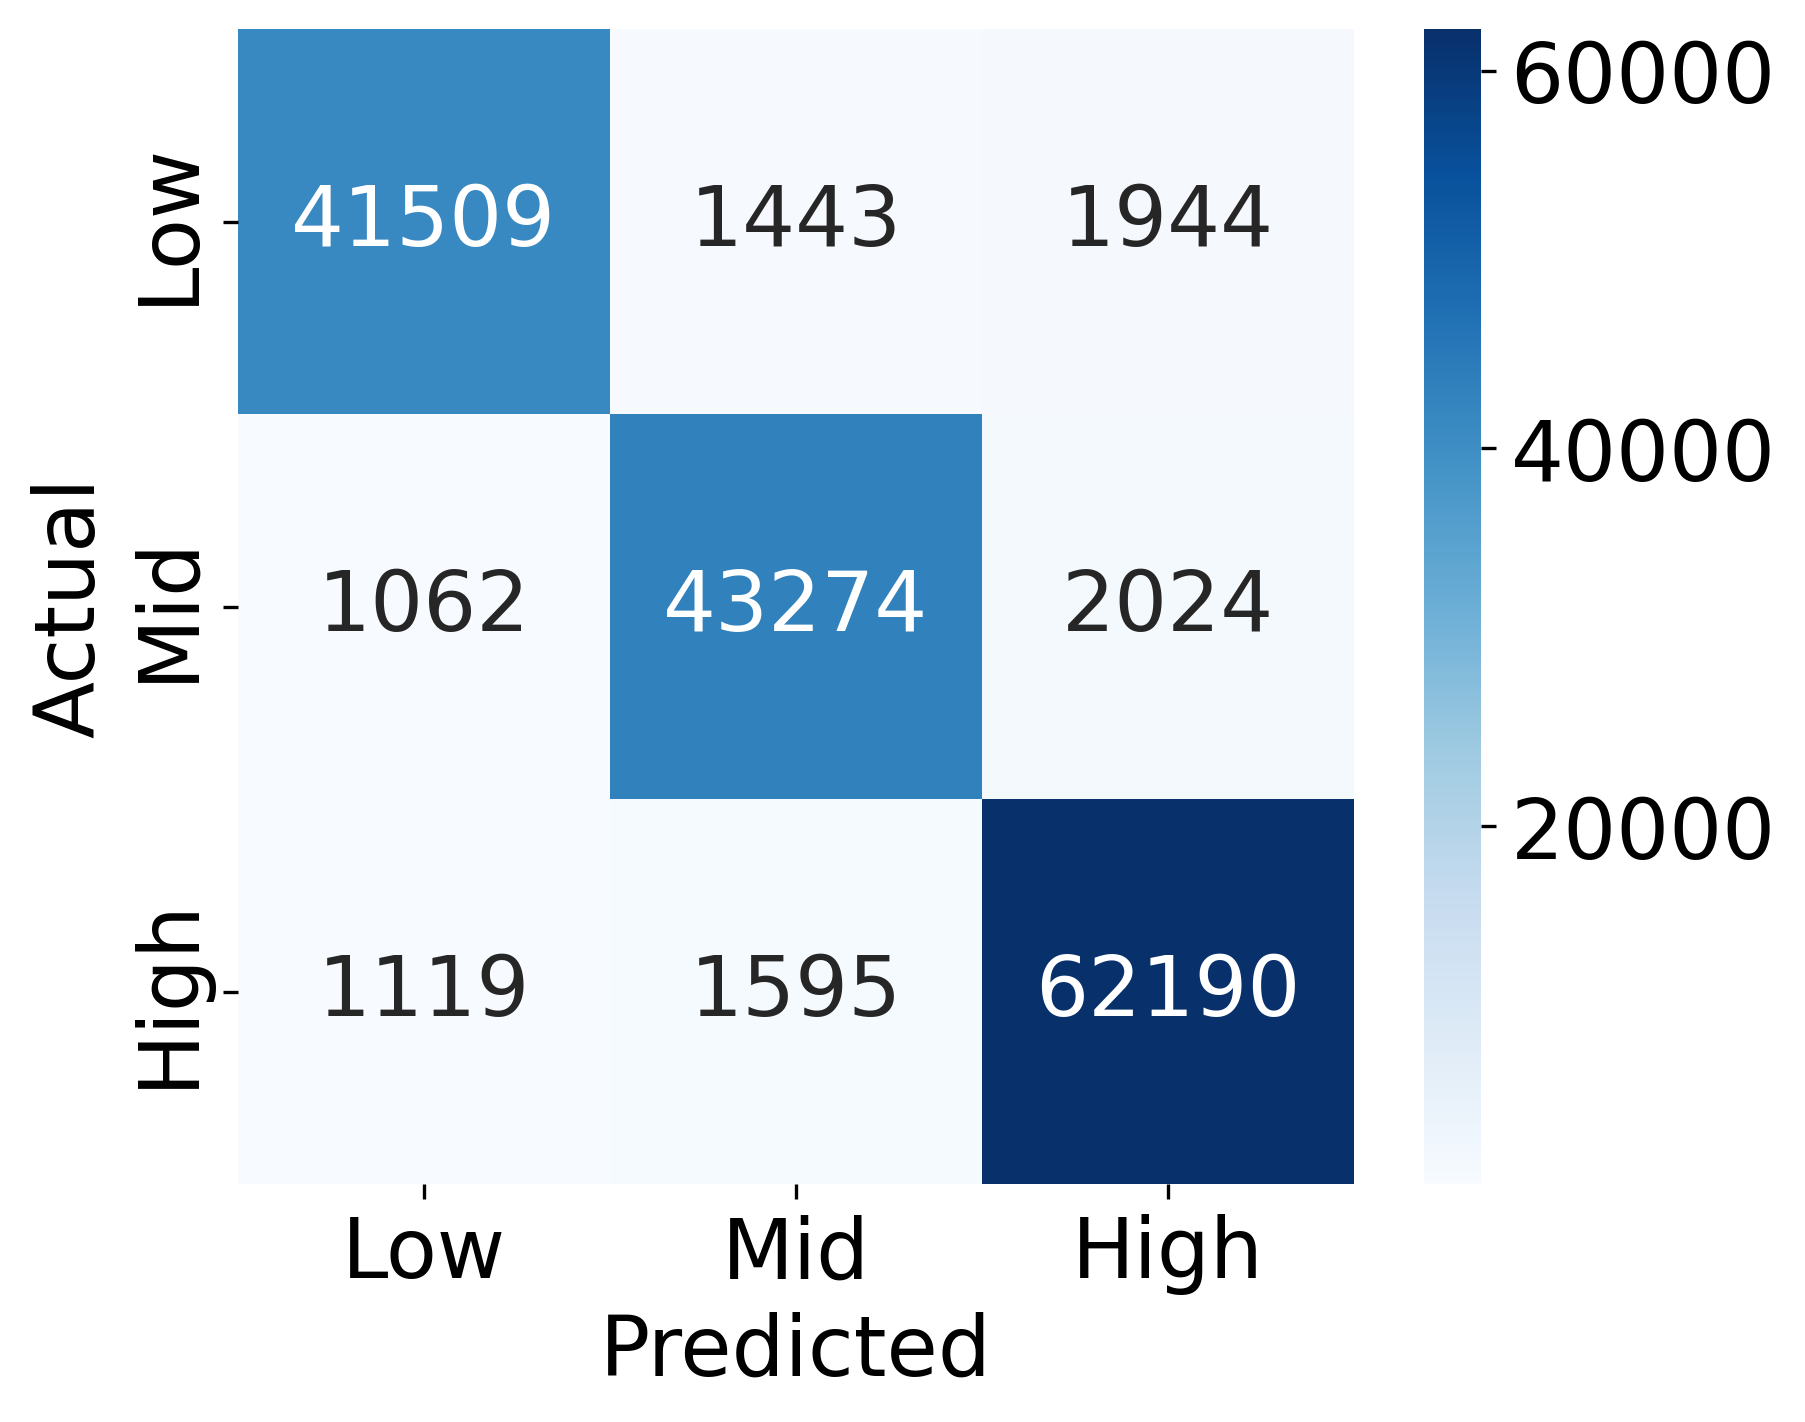

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'Mid', 'High'],
                 yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


# Dominance

### Dominance

In [ ]:
# Copy
encoded_train = train.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Dominance']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-20-5946794fb434>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Dominance']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-21-58d6eec8563d>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


### Dominance

In [ ]:
X_train = encoded_train[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
Y_train = encoded_train['Dominance']  # Target label

x_test = encoded_test[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
y_test = encoded_test['Dominance']  # Target label

### CNN Model with Residual Connection

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(3, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 61, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 61, 32)         │            224 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 61, 32)         │            128 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 61, 32)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 61, 32)         │          6,176 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 61, 32)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 32)         │            128 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 61, 32)         │              0 │ conv1d_2[0][0],        │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 32)         │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 30, 32)         │              0 │ activation_1[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 30, 64)         │         12,352 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 30, 64)         │            256 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 30, 64)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 30, 64)         │         24,640 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 30, 64)         │          2,112 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 64)         │            256 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)          

 Total params: 937,667 (3.58 MB)

 Trainable params: 935,747 (3.57 MB)

 Non-trainable params: 1,920 (7.50 KB)

**Compiling the model**

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

**Automatic save
(We have saved all the details of every epoch in google drive so that we can use this when we need.)**


In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5539 - loss: 0.9086
Epoch 1: accuracy improved from -inf to 0.59303, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/History/CNNweights-improvement-01-0.5930.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - accuracy: 0.5539 - loss: 0.9086 - val_accuracy: 0.6536 - val_loss: 0.7339
Epoch 2/100
4677/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6590 - loss: 0.7283
Epoch 2: accuracy improved from 0.59303 to 0.67275, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/History/CNNweights-improvement-02-0.6728.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6591 - loss: 0.7283 - val_accuracy: 0.7118 - val_loss: 0.6226
Epoch 3/100
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7150 - loss: 0.6254
Epoch 3: accuracy improved from 0.67275 to 0.72453, saving m

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='macro'))  # Changed average to 'macro'
    recall_scores.append(recall_score(y_resampled, y_pred, average='macro'))        # Changed average to 'macro'
    f1_scores.append(f1_score(y_resampled, y_pred, average='macro'))                # Changed average to 'macro'

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision (macro): {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall (macro): {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score (macro): {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Confidence interval for accuracy: 0.9440 - 0.9459
Confidence interval for precision (macro): 0.9428 - 0.9447
Confidence interval for recall (macro): 0.9414 - 0.9435
Confidence interval for F1 score (macro): 0.9420 - 0.9441


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9447 - loss: 0.2147
Test Accuracy: 94.48%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9447 - loss: 0.2147
Test loss: 0.2119828313589096
Test accuracy: 0.9448450207710266


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step
Test Accuracy for Class 0: 92.24%
Test Accuracy for Class 1: 94.78%
Test Accuracy for Class 2: 95.68%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


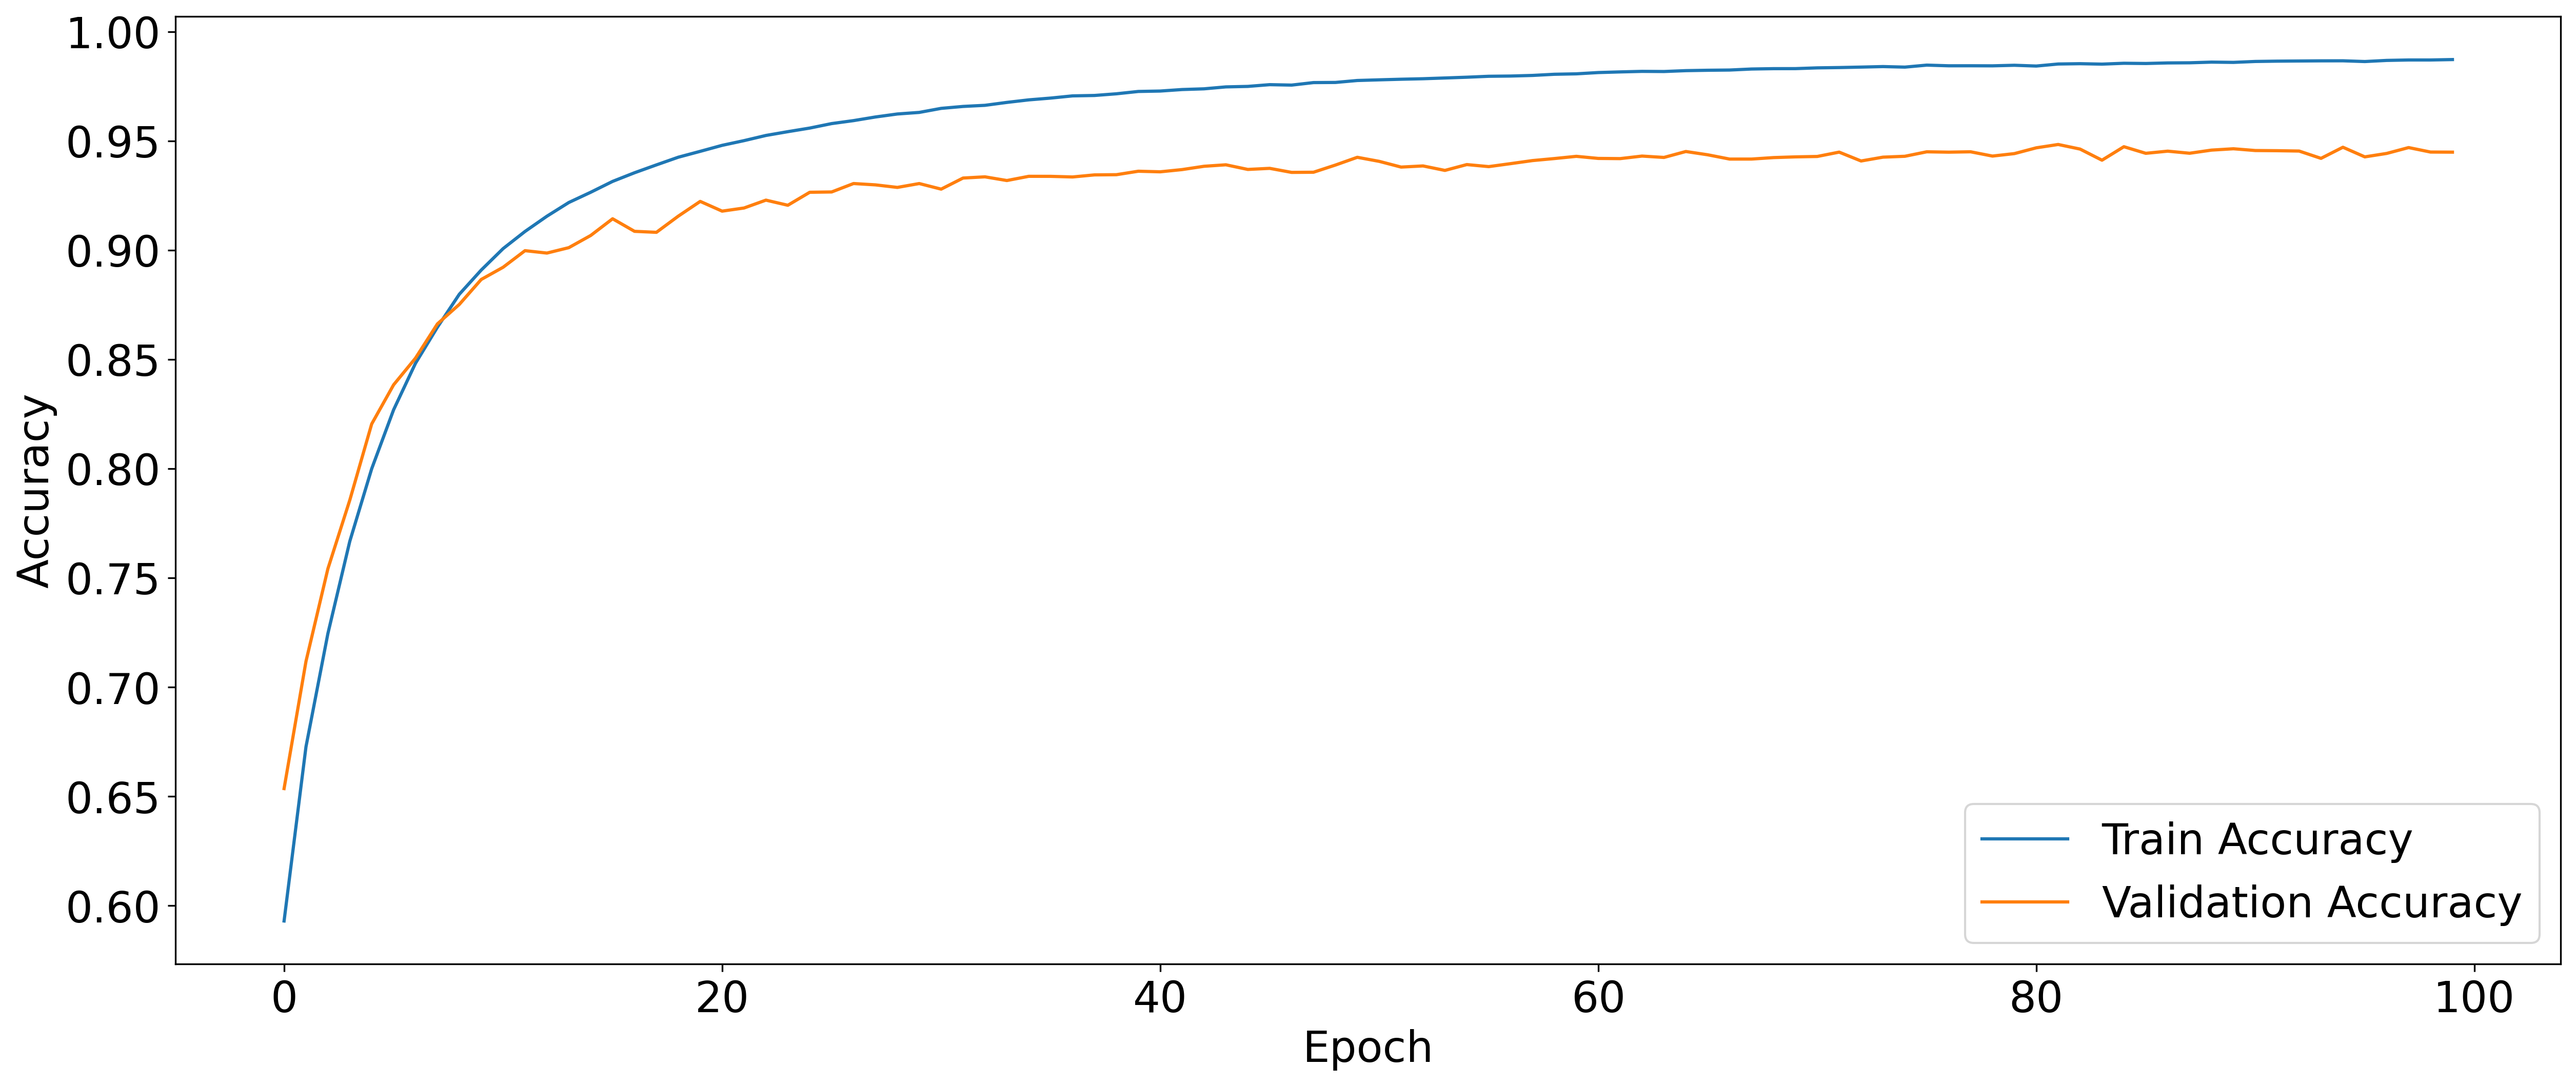

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Dominance/model.h5")

In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9447 - loss: 0.2147
Test loss: 0.2119828313589096
Test accuracy: 0.9448450207710266


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     41724
           1       0.94      0.95      0.94     47580
           2       0.95      0.96      0.95     66856

   micro avg       0.95      0.94      0.94    156160
   macro avg       0.94      0.94      0.94    156160
weighted avg       0.95      0.94      0.94    156160
 samples avg       0.94      0.94      0.94    156160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


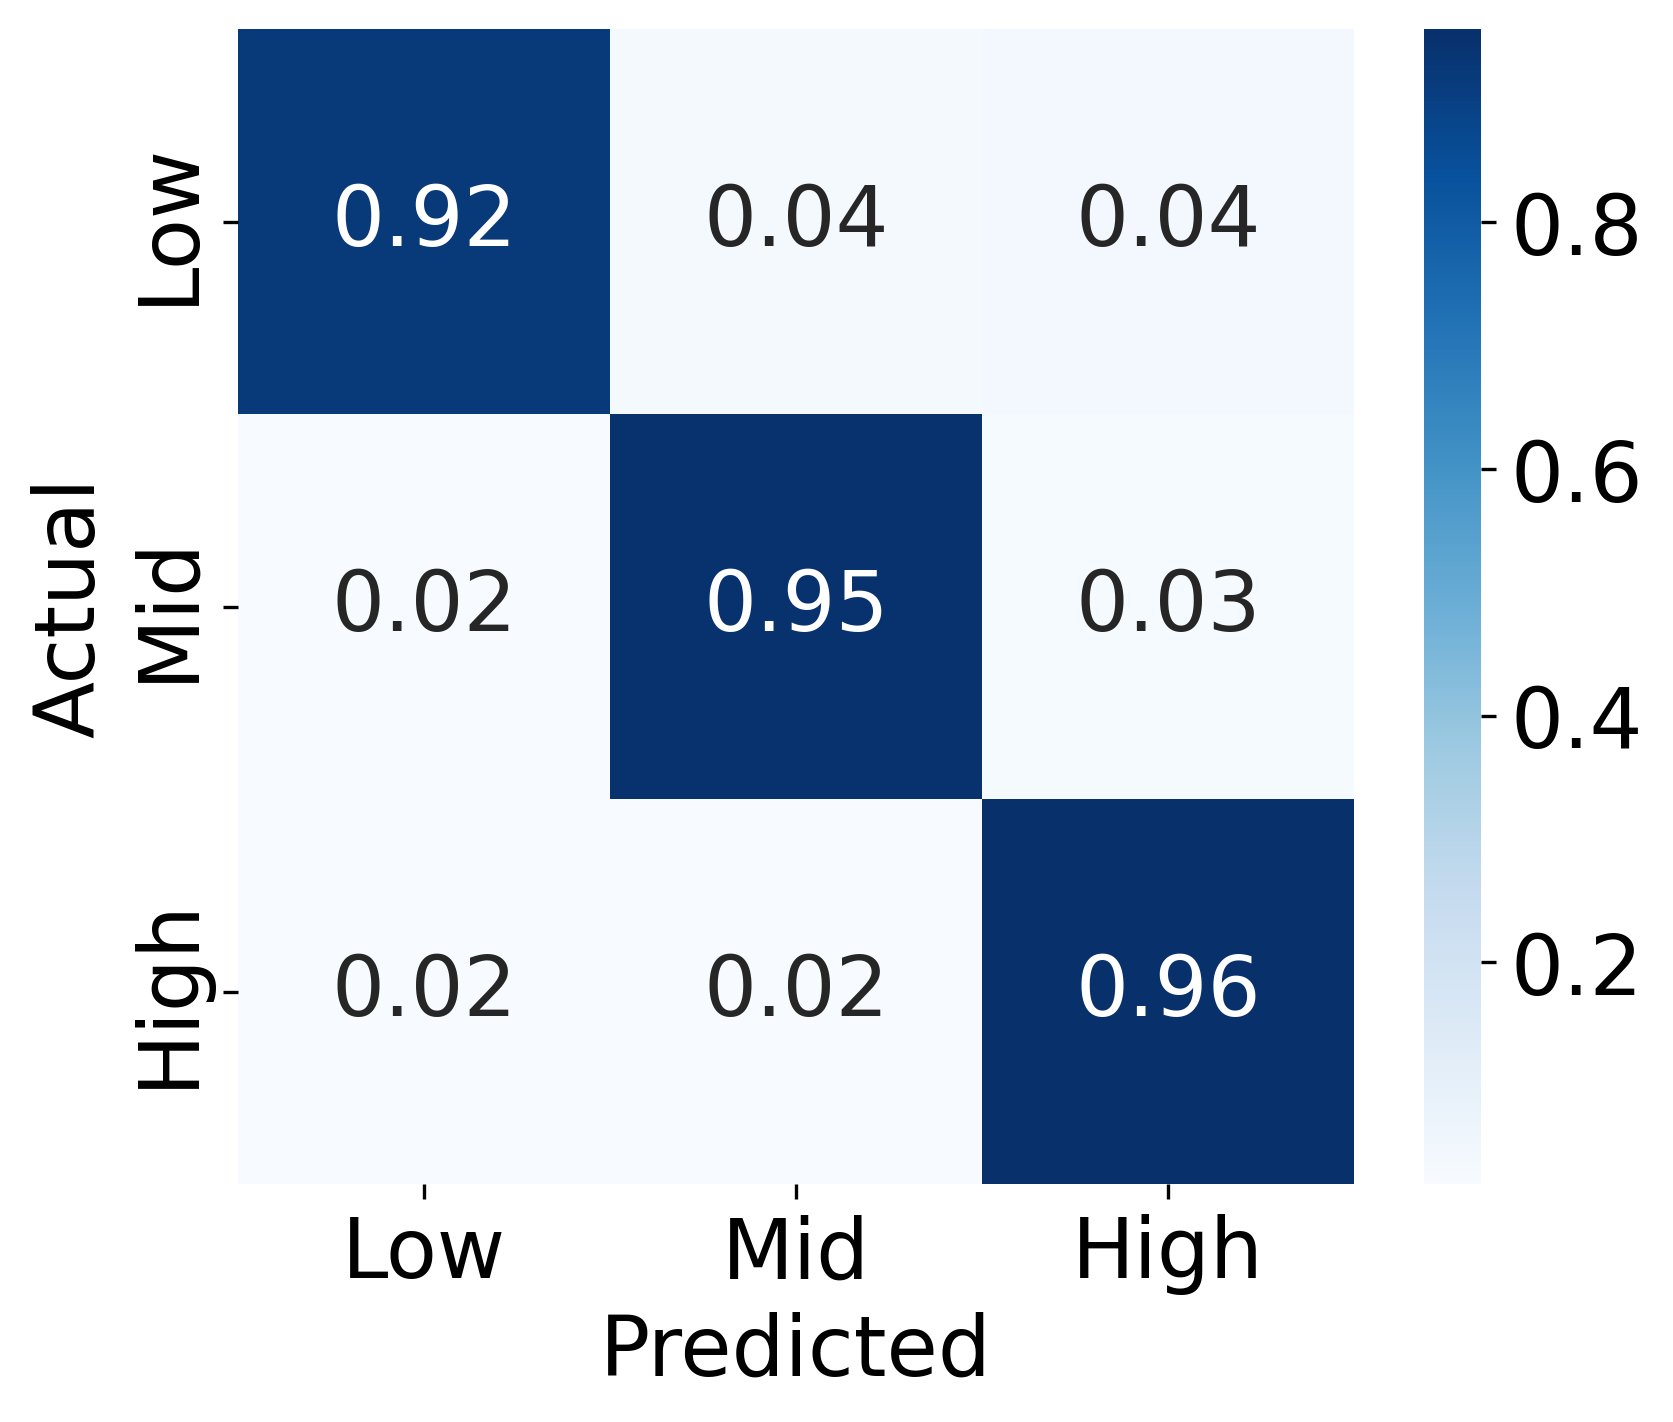

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'Mid', 'High'],
                 yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

# Liking

### Liking

In [ ]:
# Copy
encoded_train = train.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Liking']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-27-990f3a26fbbd>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Liking']

# Apply the transformation: 1-3.99 -> 0, 4-5.99 -> 1, 6-9 -> 2
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 3.99 else 1 if 4 <= x <= 5.99 else 2 if 6 <= x <= 9 else x
)

<ipython-input-28-09adf0adc9f0>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


### Dominance

In [ ]:
X_train = encoded_train[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
Y_train = encoded_train['Liking']  # Target label

x_test = encoded_test[['C1B4', 'C1B5', 'C2B1', 'C2B2', 'C2B3', 'C2B4', 'C2B5', 'C4B5', 'C5B5', 'C6B4', 'C6B5', 'C7B5', 'C8B1', 'C8B2', 'C8B3', 'C8B4', 'C8B5', 'C9B1', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C13B1', 'C16B5', 'C17B1', 'C17B3', 'C17B4', 'C17B5', 'C20B1', 'C20B2', 'C20B3', 'C20B4', 'C20B5', 'C21B1', 'C21B3', 'C22B2', 'C22B4', 'C22B5', 'C24B4', 'C24B5', 'C25B5', 'C27B1', 'C27B2', 'C27B5', 'C28B2', 'C30B4', 'C30B5', 'C31B1', 'C31B2', 'C31B3', 'C31B5', 'C33B1', 'C33B5', 'C34B5', 'C35B5', 'C38B1', 'C38B2', 'C38B3', 'C38B4', 'C38B5']]  # Input features
y_test = encoded_test['Liking']  # Target label

### CNN Model with Residual Connection

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(3, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 61, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 61, 32)         │            224 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 61, 32)         │            128 │ conv1d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 61, 32)         │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 61, 32)         │          6,176 │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 61, 32)         │             64 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 61, 32)         │            128 │ conv1d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 61, 32)         │              0 │ conv1d_14[0][0],       │
│                           │                        │                │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 61, 32)         │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 30, 32)         │              0 │ activation_9[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 30, 64)         │         12,352 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 30, 64)         │            256 │ conv1d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_10             │ (None, 30, 64)         │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 30, 64)         │         24,640 │ activation_10[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_17 (Conv1D)        │ (None, 30, 64)         │          2,112 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 30, 64)         │            256 │ conv1d_16[0][0]        │
│ (BatchNormalization) 

 Total params: 937,667 (3.58 MB)

 Trainable params: 935,747 (3.57 MB)

 Non-trainable params: 1,920 (7.50 KB)

**Compiling the model**

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

**Automatic save
(We have saved all the details of every epoch in google drive so that we can use this when we need.)**


In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Liking/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Liking/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5665 - loss: 0.9143
Epoch 1: accuracy improved from -inf to 0.59491, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Liking/History/CNNweights-improvement-01-0.5949.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.5665 - loss: 0.9143 - val_accuracy: 0.6531 - val_loss: 0.7425
Epoch 2/100
4680/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6601 - loss: 0.7316
Epoch 2: accuracy improved from 0.59491 to 0.67467, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Liking/History/CNNweights-improvement-02-0.6747.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.6602 - loss: 0.7315 - val_accuracy: 0.7070 - val_loss: 0.6385
Epoch 3/100
4680/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.6210
Epoch 3: accuracy improved from 0.67467 to 0.72821, saving model t

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Liking/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Liking/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='macro'))  # Changed average to 'macro'
    recall_scores.append(recall_score(y_resampled, y_pred, average='macro'))        # Changed average to 'macro'
    f1_scores.append(f1_score(y_resampled, y_pred, average='macro'))                # Changed average to 'macro'

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision (macro): {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall (macro): {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score (macro): {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Confidence interval for accuracy: 0.9438 - 0.9454
Confidence interval for precision (macro): 0.9358 - 0.9380
Confidence interval for recall (macro): 0.9375 - 0.9393
Confidence interval for F1 score (macro): 0.9367 - 0.9385


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9468 - loss: 0.2113
Test Accuracy: 94.47%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9468 - loss: 0.2113
Test loss: 0.2233027219772339
Test accuracy: 0.9447105526924133


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step
Test Accuracy for Class 0: 93.32%
Test Accuracy for Class 1: 92.61%
Test Accuracy for Class 2: 95.66%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Liking/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Liking/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


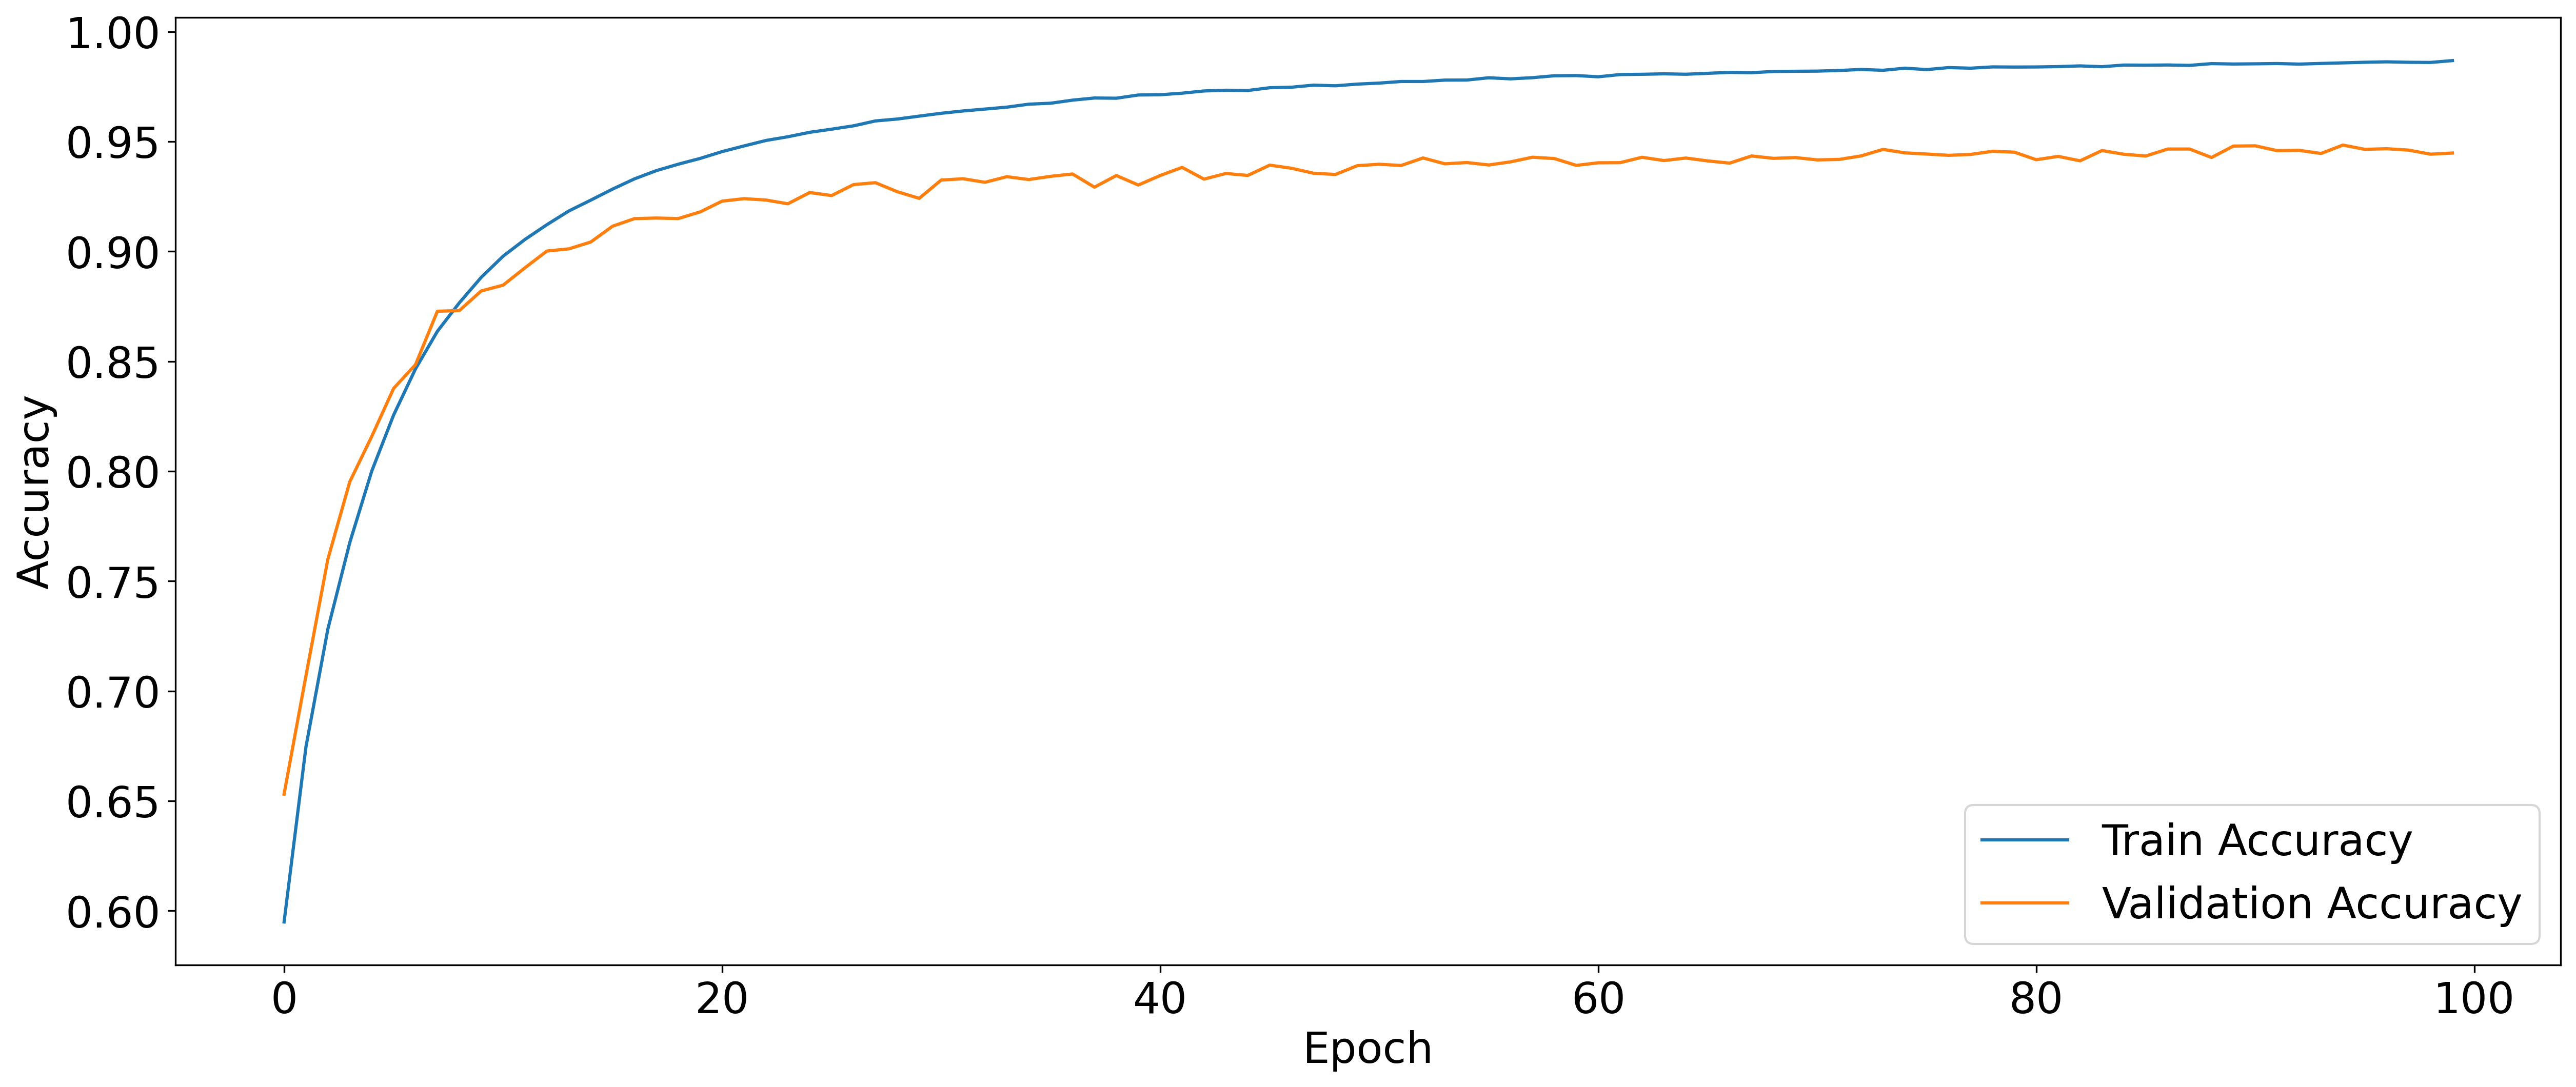

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Multiclass/Liking/model.h5")

In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9468 - loss: 0.2113
Test loss: 0.2233027219772339
Test accuracy: 0.9447105526924133


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     40260
           1       0.92      0.92      0.92     29768
           2       0.96      0.96      0.96     86132

   micro avg       0.95      0.94      0.94    156160
   macro avg       0.94      0.94      0.94    156160
weighted avg       0.95      0.94      0.94    156160
 samples avg       0.94      0.94      0.94    156160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


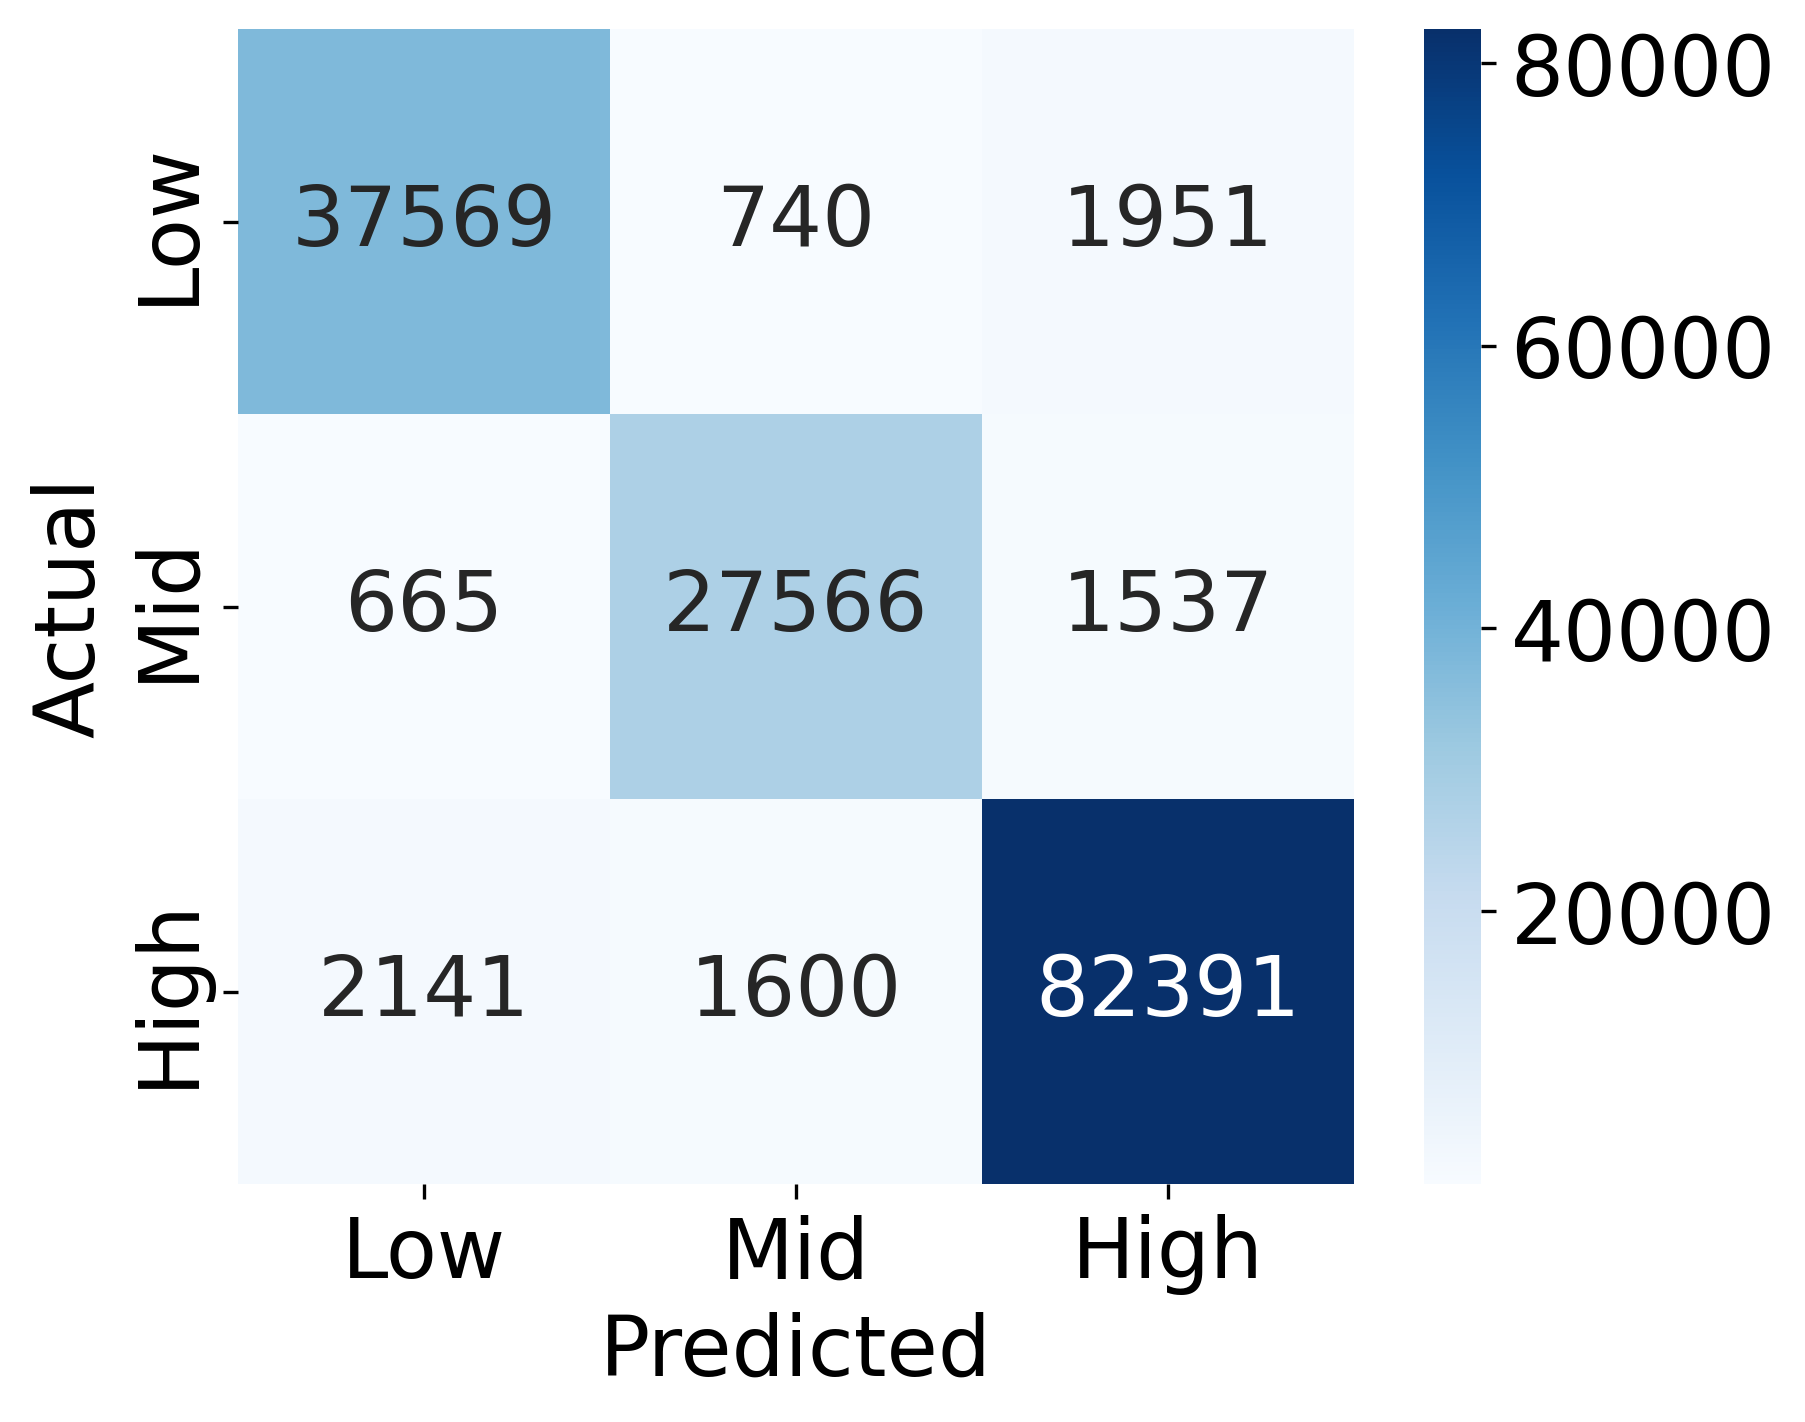

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


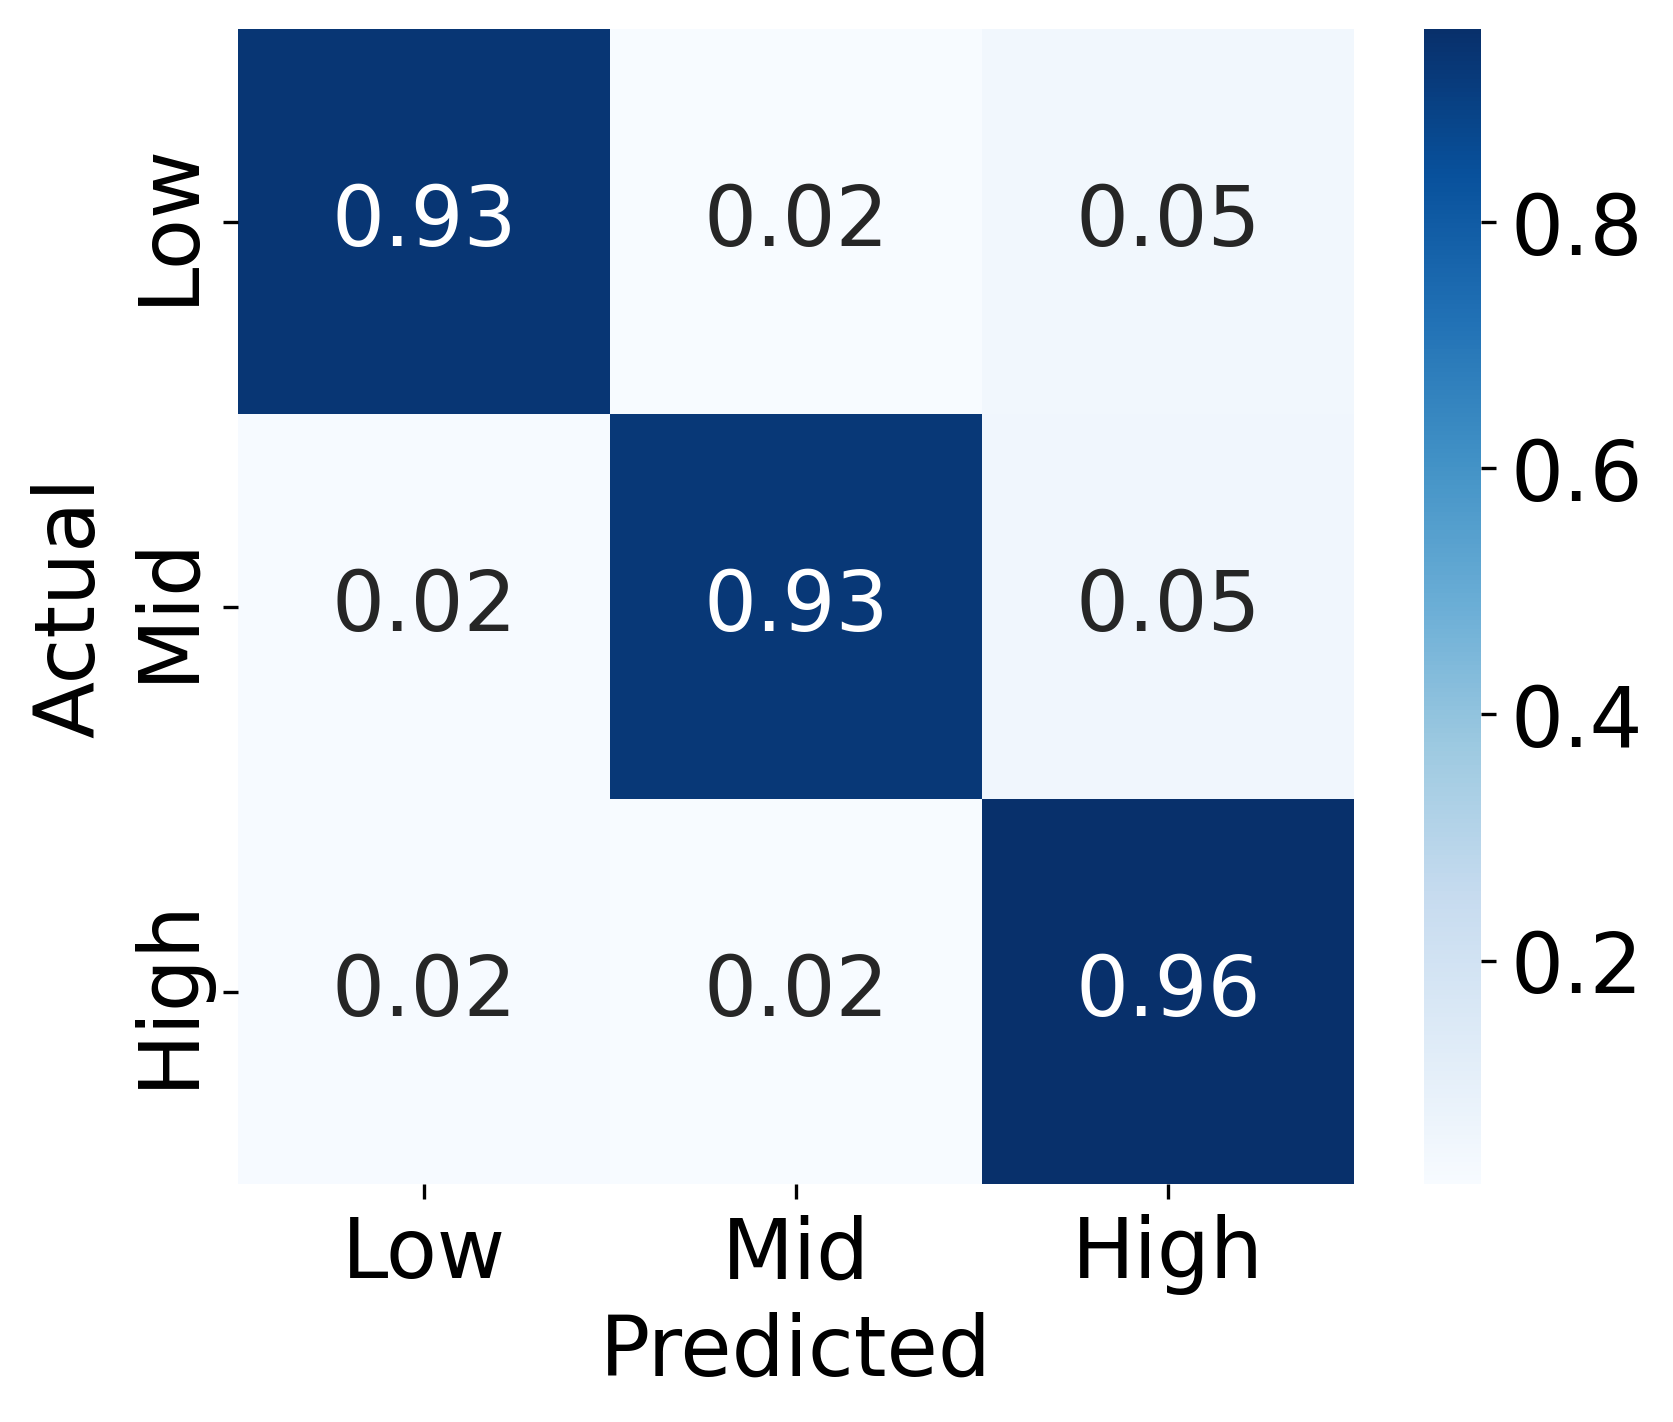

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'Mid', 'High'],
                 yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()